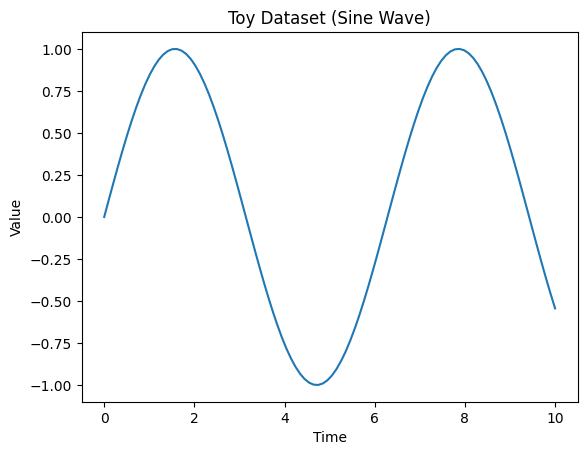

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create a toy dataset (sine wave)
num_points = 100
t = np.linspace(0, 10, num_points)
data = np.sin(t)

# Plot the dataset
plt.plot(t, data)
plt.title("Toy Dataset (Sine Wave)")
plt.xlabel("Time")
plt.ylabel("Value")
plt.show()


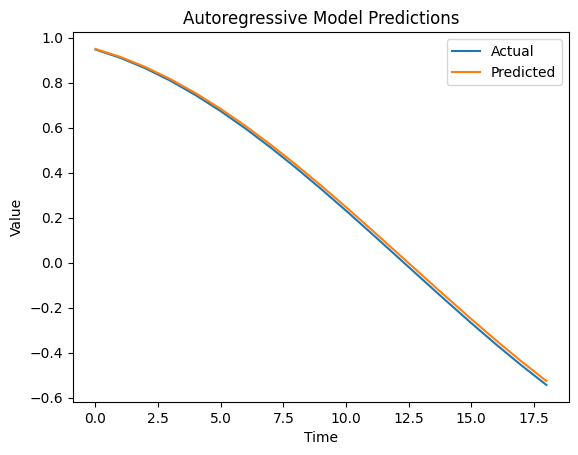

In [ ]:
# Autoregressive model parameters
n = 5  # Number of previous values to consider for prediction
num_samples = len(data)

# Create input and target data
X = []  # Input sequences (previous n values)
y = []  # Target values (next value to predict)

for i in range(n, num_samples):
    X.append(data[i - n:i])
    y.append(data[i])

X = np.array(X)
y = np.array(y)

# Split the data into training and testing sets
split_ratio = 0.8
split_index = int(split_ratio * len(X))
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Autoregressive model
class AutoregressiveModel:
    def __init__(self, n):
        self.n = n  # Number of previous values to consider
        self.weights = np.random.randn(n)
        self.bias = np.random.randn(1)

    def predict(self, input_sequence):
        return np.dot(self.weights, input_sequence) + self.bias

    def train(self, X, y, learning_rate=0.01, num_epochs=100):
        for epoch in range(num_epochs):
            for i in range(len(X)):
                input_sequence = X[i]
                target = y[i]
                prediction = self.predict(input_sequence)
                error = target - prediction

                # Update weights and bias using gradient descent
                self.weights += learning_rate * error * input_sequence
                self.bias += learning_rate * error

# Initialize and train the autoregressive model
model = AutoregressiveModel(n)
model.train(X_train, y_train)

# Make predictions on the test data
y_pred = [model.predict(input_sequence) for input_sequence in X_test]

# Plot the actual and predicted values
plt.plot(y_test, label="Actual")
plt.plot(y_pred, label="Predicted")
plt.title("Autoregressive Model Predictions")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.show()
